# Module 1 - Introduction

### Data Acquisition & Read Data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(url, header = None)
print("Data Loaded")

Data Loaded


In [ ]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
    

In [ ]:
df.columns = headers

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
df1 = df.replace("?", np.NaN)                  #replace de "?" symbol with NaN 
df = df1.dropna(subset = ["price"], axis = 0)  #Drop missing values along the column "price" as follow
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Save the Dataset

In [ ]:
df.to_csv("automobile.csv", index = False)

### Look into the dataset

In [ ]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Statistical summary 

In [ ]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [ ]:
df.describe(include = "all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,164,201,201,201,199,201,201,201,201.000000,201.000000,201.000000,201.000000,201.000000,201,201,201.000000,201,197,197,201.000000,199,199,201.000000,201.000000,201
unique,NaN,51,22,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,6,7,NaN,8,38,36,NaN,58,22,NaN,NaN,186
top,NaN,161,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,3.62,3.40,NaN,68,4800,NaN,NaN,7295
freq,NaN,11,32,181,165,113,94,118,198,NaN,NaN,NaN,NaN,NaN,145,157,NaN,92,23,19,NaN,19,36,NaN,NaN,2
mean,0.840796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,174.200995,65.889055,53.766667,2555.666667,NaN,NaN,126.875622,NaN,NaN,NaN,10.164279,NaN,NaN,25.179104,30.686567,NaN
std,1.254802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,12.322175,2.101471,2.447822,517.296727,NaN,NaN,41.546834,NaN,NaN,NaN,4.004965,NaN,NaN,6.423220,6.815150,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.800000,64.100000,52.000000,2169.000000,NaN,NaN,98.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.500000,66.600000,55.500000,2926.000000,NaN,NaN,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


# Module 2 - Data Wrangling

In [ ]:
d_f = pd.read_csv("automobile.csv")

**Data Pre-Processing**

The process of converting or mapping data from the initial "raw" form into another format, in order to prepare the data for futher analysis

**Data wrangling** (manipulación) is the process of converting data from the initial format to a format that may be better for analysis

In [ ]:
d_f.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


we need to identify what those are missing values which may hinder our further analysis

**Steps for working with missing data:**


1.   Identify missing data
2.   Deal with missing data
3.   Correct data format

the missing data could be "?", first we need to replace "?" with NaN 

**df.replace(A, B, inplace = True)    -    To replace A by B**

In [ ]:
d_f.replace("?", np.nan, inplace = True)
d_f.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


**Evaluating for missing data**

the missing valures are converted by default. These are two methods to detect missing values


1.   .isnull()  - Return a boolean same-sized object indicating if the values are NA.
2.   .notnull()   -  Return a boolean same-sized object indicating if the values are not NA

The output is a boolean value indicating whether the value that is passed into the arguments is in fact missing data

In [ ]:
missing_data = d_f.isnull()
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


**Count missing values**

Using a four loop, we can figure out the number of missing values in each column

.value_counts() - Return a Series containing counts of unique values.

In [ ]:
columns_missing_data = []
for column in d_f.columns.values.tolist():
  columnn_missing_data = missing_data[column].value_counts()
  if len(columnn_missing_data) == 2:
    print(column)
    print(columnn_missing_data)
    print("")
    columns_missing_data.append(column)

print("These columns have missing data:")
print(columns_missing_data)

normalized-losses
False    164
True      37
Name: normalized-losses, dtype: int64

num-of-doors
False    199
True       2
Name: num-of-doors, dtype: int64

bore
False    197
True       4
Name: bore, dtype: int64

stroke
False    197
True       4
Name: stroke, dtype: int64

horsepower
False    199
True       2
Name: horsepower, dtype: int64

peak-rpm
False    199
True       2
Name: peak-rpm, dtype: int64

These columns have missing data:
['normalized-losses', 'num-of-doors', 'bore', 'stroke', 'horsepower', 'peak-rpm']


**Deal with missing data**



1.   Drop Data
  *   Drop the whole row
  *   Drop the whole column
2.   Replace Data
  *   Replace by it mean
  *   Replace by it frecuency
  *   Replace it based on other functions


In [ ]:
print("These columns have missing data:")
print(columns_missing_data)
d_f[columns_missing_data].head()

These columns have missing data:
['normalized-losses', 'num-of-doors', 'bore', 'stroke', 'horsepower', 'peak-rpm']


,normalized-losses,num-of-doors,bore,stroke,horsepower,peak-rpm
0,NaN,two,3.47,2.68,111.0,5000.0
1,NaN,two,3.47,2.68,111.0,5000.0
2,NaN,two,2.68,3.47,154.0,5000.0
3,164.0,four,3.19,3.40,102.0,5500.0
4,164.0,four,3.19,3.40,115.0,5500.0


We will apply each method to many different columns to replace data

Replace by mean:


*   "normalized-losses" - 41 missing data
*   "stroke" - 4 missing data
*   "bore" - 4 missing data
*   "horsepower" - 2 missing data
*   "peak-rpm" - 2 missing data

Replace by frecuency:
*   "num-of-doors" - 2 missing data, replace the with "Four"
    *  Reason: 84% sedans is "four" doors, since four doors is most frequent

Drop the whole row
*   "Price" - 4 missing data, simply delete the whole row
      *   Reason: price is what we want to predict 

**Calculate the replace & Change the values**

In [ ]:
#'normalized-losses'
avg_norm_loss = d_f['normalized-losses'].astype("float").mean(axis = 0)
print("Average of normalized losses: {}".format(avg_norm_loss))

d_f["normalized-losses"].replace(np.nan, avg_norm_loss, inplace = True)

Average of normalized losses: 122.0


In [ ]:
#'bore'
avg_bore = d_f["bore"].astype("float").mean(axis = 0)
print("Average of bore: {}".format(avg_bore))

d_f["bore"].replace(np.nan, avg_bore, inplace = True)

Average of bore: 3.3307106598984775


In [ ]:
#'stroke'
avg_stroke = d_f["stroke"].astype("float").mean(axis = 0)
print("Average of stroke: {}".format(avg_stroke))

d_f["stroke"].replace(np.nan, avg_stroke, inplace = True)

Average of stroke: 3.2569035532994857


In [ ]:
#'horsepower'
avg_horsepower = d_f["horsepower"].astype("float").mean(axis = 0)
print("Average of horsepower: {}".format(avg_horsepower))

d_f["horsepower"].replace(np.nan, avg_horsepower, inplace = True)

Average of horsepower: 103.39698492462311


In [ ]:
#'peak-rpm'
avg_peak_rpm = d_f["peak-rpm"].astype("float").mean(axis = 0)
print("Average of peak-rpm: {}".format(avg_peak_rpm))

d_f["peak-rpm"].replace(np.nan, avg_peak_rpm, inplace = True)

Average of peak-rpm: 5117.587939698493


In [ ]:
# "num-of-doors"
d_f["num-of-doors"].value_counts()

four    113
two      86
Name: num-of-doors, dtype: int64

We can see that "Four" doors are the most common type

In [ ]:
type_door = d_f["num-of-doors"].value_counts().idxmax()
print("{} is the most common type".format(type_door))

d_f["num-of-doors"].replace(np.nan, type_door, inplace = True)

four is the most common type


finally, let's drop all rows that do not have price data

* .dropna - Remove missing values
* .reset_index - Reset the index, or a level of it

In [ ]:
d_f.dropna(subset = ["price"], axis = 0, inplace = True)

d_f.reset_index(drop = True, inplace = True)

In [ ]:
d_f.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


Good! Now, we have a dataset with no missing values

**Correct data format**

the last step in data cleaning is checking and making sure that all the data is in the correct format (int, float, string or other)

* .dtype to check the data type
* .astype to change the data type

In [ ]:
d_f.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [ ]:
#convert data types to proper format

d_f[["bore", "stroke"]] = d_f[["bore", "stroke"]].astype("float")
d_f["normalized-losses"] = d_f["normalized-losses"].astype("int")
d_f["price"] = d_f["price"].astype("float")
d_f["peak-rpm"] = d_f["peak-rpm"].astype("float")

In [ ]:
d_f.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

**Data Standarization**

Standarization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison

in this project:
L/100km - 235 / mpg

In [ ]:
d_f["city-L/100km"] = 235 / d_f["city-mpg"]
d_f.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556


In [ ]:
d_f["highway-mpg"] = 235 / d_f["highway-mpg"]

d_f.rename(columns = {"highway-mpg":"highway-L/100km"}, inplace = True)
d_f.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,10.681818,17450.0,13.055556


**Data Normalization**

Normalization is the process of transforming values of several into a similar range

Typicals normalizations are:
* Simple feature scaling:   $x_{new} = \frac{x_{old}}{x_{max}}$
* Min - Max:   $x_{new} = \frac{x_{old} - x_{min}}{x_{max} - x_{min}}$
* Z - score:  $x_{new} = \frac{x_{old} - \mu}{\sigma}$



In this project, let's say we want to scale the columns "length", "Width", "height"

In [ ]:
d_f["length"] = d_f["length"] / d_f["length"].max()
d_f["width"] = d_f["width"] / d_f["width"].max()
d_f["height"] = d_f["height"] / d_f["height"].max()

d_f[["length", "width", "height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


**Binning**

is the process of transforming continuous numerical variable into discrete categorical "bins" for grouped analysis



"horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values  

In [ ]:
d_f["horsepower"] = d_f["horsepower"].astype(int, copy = True)

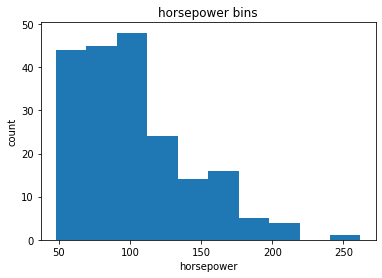

This is the distribution of the data column horsepower


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(d_f["horsepower"])
plt.ylabel("count")
plt.xlabel("horsepower")
plt.title("horsepower bins")
plt.show()

print("This is the distribution of the data column horsepower")

we would like 3 bins of equal size bandwidth 

**linspace(start_value, end_value, number_generated)** 

start_value = min(df[])

end_value = max(df[])

number_generated = in this case we are building 3 bins of equal length, there should be 4 dividers

In [ ]:
bins = np.linspace(min(d_f["horsepower"]), max(d_f["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [ ]:
group_names = ["Low", "Medium", "High"]

**pd.cut:**

Bin values into discrete intervals.

Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges. Supports binning into an equal number of bins, or a pre-specified array of bins

In [ ]:
d_f["horsepower-binned"] = pd.cut(d_f["horsepower"], bins, labels = group_names, include_lowest = True)
d_f[["horsepower", "horsepower-binned"]].head()

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low


In [ ]:
d_f["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

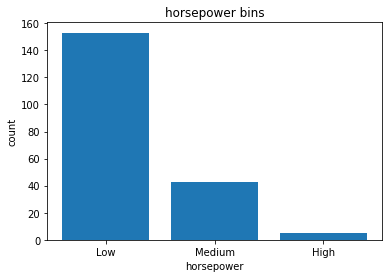

This is the distribution of the new data column horsepower-binned


In [ ]:
plt.bar(group_names, d_f["horsepower-binned"].value_counts())
plt.ylabel("count")
plt.xlabel("horsepower")
plt.title("horsepower bins")
plt.show()

print("This is the distribution of the new data column horsepower-binned")

**Bind Visualization**

Normally, a histogram is used to visualize the distribution of bins we created above

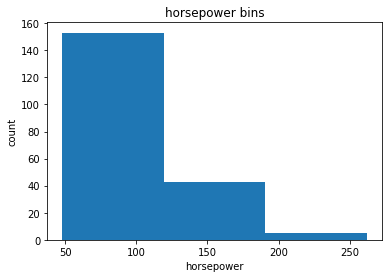

In [ ]:
plt.hist(d_f["horsepower"], bins = 3)
plt.ylabel("count")
plt.xlabel("horsepower")
plt.title("horsepower bins")
plt.show()


**Indicator Variable (or Dummy Variable)**

An indicator variable is a numerical variable ised to label categories. They are called "dummies" because the numbers themselves don´t have inherent meaning

We use indicator variables so we can use categorical variables for regression analysis n the later modules

**pd.get_dummies**

Convert categorical variable into dummy/indicator variables.

In [ ]:
d_f.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')

In [ ]:
dummy_variable_1 = pd.get_dummies(d_f["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


Chane the column names for clarity

In [ ]:
dummy_variable_1.rename(columns = {"gas":"fuel-type-gas", "diesel":"fuel-type-diesel"}, inplace = True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
#Merge data frame "df" and "dummy_variable"
d_f = pd.concat([d_f, dummy_variable_1], axis = 1)

#Drop original column "fuel-type" from "df"
d_f.drop("fuel-type", axis = 1, inplace = True)

In [ ]:
d_f.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,0,1


In [ ]:
#Get the indicator variables of aspiration 
dummy_variable_2 = pd.get_dummies(d_f["aspiration"])

#change column names for clarity
dummy_variable_2.rename(columns = {"std":"aspiration-std", "turbo":"aspiration-turbo"}, inplace = True)

dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
d_f = pd.concat([d_f, dummy_variable_2], axis = 1)
d_f.drop("aspiration", axis = 1, inplace = True)

In [ ]:
d_f.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0


In [ ]:
d_f.to_csv("clean_automobile.csv", index = False)

# Module 3 - Exploratory Data Analysis

**Analyzing individual feature pattern using visualization**

How to choose the right visualization method

When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.

In [ ]:
d_f.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0


In [ ]:
d_f.dtypes

symboling               int64
normalized-losses       int64
make                   object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int64
peak-rpm              float64
city-mpg                int64
highway-L/100km       float64
price                 float64
city-L/100km          float64
horsepower-binned    category
fuel-type-diesel        uint8
fuel-type-gas           uint8
aspiration-std          uint8
aspiration-turbo        uint8
dtype: object

In [ ]:
d_f.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,-0.007992,-0.182196,0.075776,0.279719,-0.035527,-0.029807,-0.082391,0.066171,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,0.055127,-0.114713,0.217300,0.239544,-0.225016,0.181189,0.133999,0.238567,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,0.250313,0.371297,-0.360233,-0.470606,0.577576,0.584642,0.476153,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,0.159733,0.579688,-0.286035,-0.665192,0.707108,0.690628,0.657373,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188814,0.189867,0.614972,-0.245852,-0.633531,0.736728,0.751265,0.673363,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,-0.060822,0.259737,-0.086901,-0.309913,-0.049800,0.084301,0.135486,0.003811,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,0.167412,0.156433,0.758001,-0.279350,-0.749543,0.836921,0.834415,0.785353,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572516,0.205806,0.028889,0.822636,-0.256753,-0.650546,0.783465,0.872335,0.745059,0.070779,-0.070779,-0.110040,0.110040
bore,-0.139896,-0.029800,0.493203,0.608941,0.544879,0.180327,0.644041,0.572516,1.000000,-0.055390,0.001250,0.566786,-0.267338,-0.582121,0.559197,0.543154,0.554726,0.054435,-0.054435,-0.227782,0.227782
stroke,-0.007992,0.055127,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,0.187854,0.097598,-0.063720,-0.034079,0.047199,0.082267,0.036285,0.241033,-0.241033,-0.218190,0.218190


In [ ]:
d_f[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001250,0.566786
stroke,-0.055390,1.000000,0.187854,0.097598
compression-ratio,0.001250,0.187854,1.000000,-0.214392
horsepower,0.566786,0.097598,-0.214392,1.000000



**Continuous Numerical Variables**

Continuous numerical variables are variables that may contain any value within some range. They can be of type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.

In order to start understanding the (linear) relationship between an individual variable and the price, we can use "regplot" which plots the **scatterplot** plus the fitted **regression line** for the data.

**Positive Linear Relationship**



(0.0, 53280.60619685668)

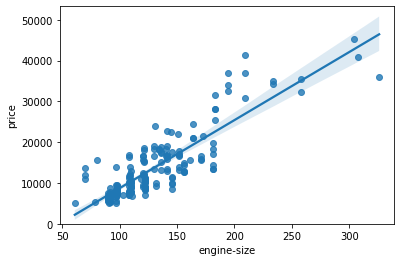

In [ ]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=d_f)
plt.ylim(0,)

In [ ]:
d_f[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


**Positive Linear Relationship**

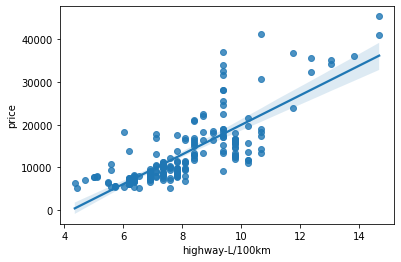

In [ ]:
sns.regplot(x="highway-L/100km", y="price", data=d_f)

In [ ]:
d_f[['highway-L/100km', 'price']].corr()

,highway-L/100km,price
highway-L/100km,1.000000,0.801118
price,0.801118,1.000000


**Weak Linear Relationship**

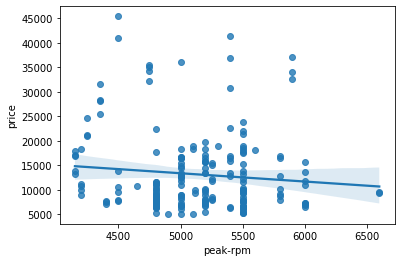

In [ ]:
sns.regplot(x="peak-rpm", y="price", data=d_f)

In [ ]:
d_f[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101542
price,-0.101542,1.000000


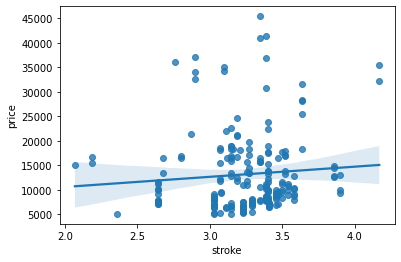

In [ ]:
sns.regplot(x = "stroke", y = "price", data = d_f)

In [ ]:
d_f[["stroke", "price"]].corr()

,stroke,price
stroke,1.000000,0.082267
price,0.082267,1.000000


**Categorical Variables**

These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using **boxplots**.

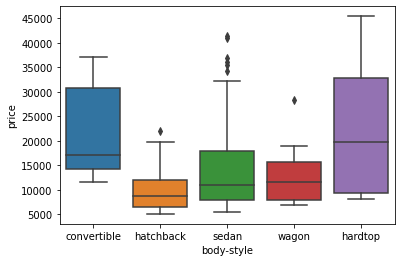

In [ ]:
sns.boxplot(x="body-style", y="price", data=d_f)

We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price.

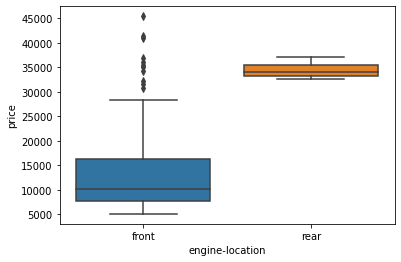

In [ ]:
sns.boxplot(x="engine-location", y="price", data=d_f)

Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

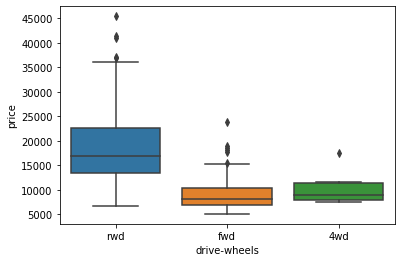

In [ ]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=d_f)

Here we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.

**Descriptive Statistical Analysis**

The describe function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.

This will show:

* the count of that variable
* the mean
* the standard deviation (std)
* the minimum value
* the IQR (Interquartile Range: 25%, 50% and 75%)
* the maximum value

In [ ]:
d_f.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330711,3.256904,10.164279,103.393035,5117.587940,25.179104,8.044957,13207.129353,9.944145,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,4.004965,37.365623,478.113178,6.423220,1.840739,7947.066342,2.534599,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,4.351852,5118.000000,4.795918,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,6.911765,7775.000000,7.833333,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5117.587940,24.000000,7.833333,10295.000000,9.791667,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,9.400000,16500.000000,12.368421,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,14.687500,45400.000000,18.076923,1.000000,1.000000,1.000000,1.000000


In [ ]:
d_f.describe(include = ["object"])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


**value_counts()**

Value counts is a good way of understanding how many units of each characteristic/variable we have.

Don’t forget the method "value_counts" only works on pandas series, not pandas dataframes

In [ ]:
d_f["drive-wheels"].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [ ]:
drive_wheels_counts = d_f['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [ ]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [ ]:
# engine-location as variable
engine_loc_counts = d_f['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


After examining the value counts of the engine location, we see that engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, so this result is skewed. Thus, we are not able to draw any conclusions about the engine location.

**Basics of grouping**

The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.


In [ ]:
d_f["drive-wheels"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

If we want to know, on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.

We can select the columns 'drive-wheels', 'body-style' and 'price', then assign it to the variable "df_group_one".


In [ ]:
d_f_group_one = d_f[['drive-wheels','body-style','price']]

We can then calculate the average price for each of the different categories of data.

In [ ]:
# grouping results
d_f_group_one = d_f_group_one.groupby(['drive-wheels'],as_index=False).mean()
d_f_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.


You can also group by multiple variables. For example, let's group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combination of 'drive-wheels' and 'body-style'. We can store the results in the variable 'grouped_test1'.

In [ ]:
d_f_gptest = d_f[["drive-wheels", "body-style", "price"]]
grouped_test1 = d_f_gptest.groupby(["drive-wheels", "body-style"], as_index = False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


This grouped data is much easier to visualize when it is made into a **pivot table**. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot" to create a pivot table from the groups.

In [ ]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  NaN           NaN  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

Often, we won't have data for some of the pivot cells. We can fill these missing cells with the value 0, but any other value could potentially be used as well. It should be mentioned that missing data is quite a complex subject and is an entire course on its own.

In [ ]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  0.0      0.000000  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

In [ ]:
# grouping results
d_f_gptest2 = d_f[['body-style','price']]
grouped_test_bodystyle = d_f_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


**Vairables: Drive Wheels and Body Style vs. Price**

ñet´s use a heat map to visualize the relationship between Body Style and Price

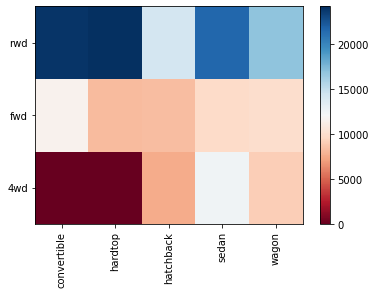

In [ ]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap = "RdBu")

#Label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#Move
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor = False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor = False)

#insert labels
ax.set_xticklabels(row_labels, minor = False)
ax.set_yticklabels(col_labels, minor = False)

#rotate label if too long
plt.xticks(rotation = 90)

fig.colorbar(im)
plt.show()

The heatmap plots the target variable proportional to colour with respect to the variables on the vertical and horizontal axis, respectively. This allows us to visualize how the price is related to drive-wheel and bodt-style

**Correlation and Causation**

*Correlation*: A measure of the extent of interdependence between variables

*Causation*: The relationship between cause and effect between two variables

Determinig correlation is much simpler the determining causation as causation may require independent experiment

**Pearson Correlation**

Measures the linear dependence between two variables
The resylting value is between [-1, 1] inclusive, where:
* 1: Predict Positive Linear Correlation
* 0: No linear correlation
* -1: Perfect Negative Correlation

**P-Value**

is the probability values that the correlation between these two variables is statistically significant. Normally, we choose a significanse level of 0.05 which means that we are 95% confident that the correlation between the variables is significant

In [ ]:
from scipy import stats

In [ ]:
#Wheel-Base vs Price

pearson_coef, p_value = stats.pearsonr(d_f["wheel-base"], d_f["price"])
print("The pearson Correlation Coefficient is: {}  and the p-value is: {}".format(pearson_coef, p_value))

The pearson Correlation Coefficient is: 0.584641822265508  and the p-value is: 8.076488270733218e-20


In [ ]:
#Horsepower vs Price

pearson_coef, p_value = stats.pearsonr(d_f["horsepower"], d_f["price"])
print("The pearson Correlation Coefficient is: {}  and the p-value is: {}".format(pearson_coef, p_value))

The pearson Correlation Coefficient is: 0.8097290352560285  and the p-value is: 5.924001027593172e-48


In [ ]:
#Width vs Price

pearson_coef, p_value = stats.pearsonr(d_f["width"], d_f["price"])
print("The pearson Correlation Coefficient is: {}  and the p-value is: {}".format(pearson_coef, p_value))

The pearson Correlation Coefficient is: 0.7512653440522673  and the p-value is: 9.200335510481646e-38


In [ ]:
#Curb-Weigth vs Price

pearson_coef, p_value = stats.pearsonr(d_f["curb-weight"], d_f["price"])
print("The pearson Correlation Coefficient is: {}  and the p-value is: {}".format(pearson_coef, p_value))

The pearson Correlation Coefficient is: 0.8344145257702843  and the p-value is: 2.189577238894065e-53


In [ ]:
#Wheel-Base vs Price

pearson_coef, p_value = stats.pearsonr(d_f["engine-size"], d_f["price"])
print("The pearson Correlation Coefficient is: {}  and the p-value is: {}".format(pearson_coef, p_value))

The pearson Correlation Coefficient is: 0.8723351674455185  and the p-value is: 9.265491622198389e-64


In [ ]:
#Wheel-Base vs Price

pearson_coef, p_value = stats.pearsonr(d_f["bore"], d_f["price"])
print("The pearson Correlation Coefficient is: {}  and the p-value is: {}".format(pearson_coef, p_value))

The pearson Correlation Coefficient is: 0.5431537659807734  and the p-value is: 8.051208825441016e-17


In [ ]:
#Wheel-Base vs Price

pearson_coef, p_value = stats.pearsonr(d_f["city-mpg"], d_f["price"])
print("The pearson Correlation Coefficient is: {}  and the p-value is: {}".format(pearson_coef, p_value))

The pearson Correlation Coefficient is: -0.6865710067844677  and the p-value is: 2.321132065567674e-29


In [ ]:
#Wheel-Base vs Price

pearson_coef, p_value = stats.pearsonr(d_f["highway-L/100km"], d_f["price"])
print("The pearson Correlation Coefficient is: {}  and the p-value is: {}".format(pearson_coef, p_value))

The pearson Correlation Coefficient is: 0.8011176263981974  and the p-value is: 3.046784581041456e-46


**ANOVA**

The analysis of Variance (ANOVA) is a statistical method used td test whether there are significant differences between the means of two or more groups

*f-test score*: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports to as the f-test score. **A larger score means there is a larger difference between means.**

*P-value*: tells how statistically out calculated score value is




In [ ]:
d_f_gptest.head()

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0


In [ ]:
grouped_test2 = d_f_gptest[["drive-wheels", "price"]].groupby(["drive-wheels"])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


we can obtain the values of the methos group using the method 

**get_group** 

Construct DataFrame from group with provided name.

In [ ]:
grouped_test2.get_group("4wd")["price"]

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

we can use the function **f_oneway** in the module **stats** to obatain the **F.test** score and **P-value**



In [ ]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group("fwd")["price"], grouped_test2.get_group("rwd")["price"], grouped_test2.get_group("4wd")["price"])
print("ANOVA results: F = {}, p = {}".format(f_val, p_val))

ANOVA results: F = 67.95406500780399, p = 3.3945443577151245e-23


This is a great result with a large F-test score showing a strong correlation and P-value of almost 0 implying almost certain statistical significance. But does this mean all three groups are all this highly correlated?

let´s examine them separately

In [ ]:
#fwd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group("fwd")["price"], grouped_test2.get_group("rwd")["price"])
print("ANOVA results: F = {}, p = {}".format(f_val, p_val))

ANOVA results: F = 130.5533160959111, p = 2.2355306355677845e-23


In [ ]:
#4wd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group("rwd")["price"], grouped_test2.get_group("4wd")["price"])
print("ANOVA results: F = {}, p = {}".format(f_val, p_val))

ANOVA results: F = 8.580681368924756, p = 0.004411492211225333


In [ ]:
#fwd and 4wd
f_val, p_val = stats.f_oneway(grouped_test2.get_group("fwd")["price"],  grouped_test2.get_group("4wd")["price"])
print("ANOVA results: F = {}, p = {}".format(f_val, p_val))

ANOVA results: F = 0.6654657502523033, p = 0.41620116697845666


We now have a better idea of what our data looks like variables are important to take when predicting the car price. we have narrowed it down to the following variables_

Continuous variables:
* Length
* Width
* Curb-weight
* Engine-size
* Horsepower
* City-mpg
* Highway-L/100km
* Wheel-base
* Bore

Categorical variables
* Drive-wheels

As we now move into building machine learning models to automate our analysis feeding our analysis the model with variables that meaningfully affect our target variable will improve our model's prediction performance

# Module 4 - Model Development

In [ ]:
df = pd.read_csv("clean_automobile.csv")
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0


**Linear Regression & Multiple Linear Regression**

*Linear Regression* 

is a method to help understand the relationship between two variables
* The predictor/independent variable (X)
* The response/dependent variable (Y)

Linear function

$yhat = a + b X$

*a* = refers to the intercept of the regression

*b* = refers to the slope of the regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

How could "highwaay-L/100km" help us predict car price?

In [ ]:
x = df[["highway-L/100km"]]
y = df["price"]

lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
yhat = lr.predict(x)
print("The normal data")
print(y[0:5])
print("")
print("The prediction data")
print(yhat[0:5])

The normal data
0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

The prediction data
[15485.52737455 15485.52737455 16643.34931414 12475.19033163
 22327.2024721 ]


In [ ]:
print("The intercept: {}, and the slope: {}".format(lr.intercept_, lr.coef_))

The intercept: -14617.843054664605, and the slope: [3458.68511314]


the linear model with the structure

$yhat = -14617.84 + 3458 * (Highway L/100km)$

How could the "engine size" help us predict car price?

In [ ]:
lr_1 = LinearRegression()

In [ ]:
lr_1.fit(df[["engine-size"]], df["price"])
lr_1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("The intercept: {}, and the slope: {}".format(lr_1.intercept_, lr_1.coef_))

The intercept: -7963.338906281042, and the slope: [166.86001569]


the linear function is:

$yhat = -7963.33 + 166.86 * (Engine size)$

**Multiple linear Regression**

if we want to use more variables in our model to predict car price

this method is used to explain the relationship between onde contiuous response (dependent) and two or more predictors (independent) variables

$y: Response Variable$

$x_1: Predictor variable 1$

$x_2: Predictor variable 2$

$x_n: Predictor variable 3$

$b_1: coeff variable 1$

$b_2: coeff variable 2$

$b_n: coeff variable 3$

$yhat = a + b_1 * x_1 + b_2 * x_2 + b_3 * x_3$

In [ ]:
z = df[["horsepower", "curb-weight", "engine-size", "highway-L/100km"]]
y = df["price"]
z.head()

,horsepower,curb-weight,engine-size,highway-L/100km
0,111,2548,130,8.703704
1,111,2548,130,8.703704
2,154,2823,152,9.038462
3,102,2337,109,7.833333
4,115,2824,136,10.681818


In [ ]:
lr_2 = LinearRegression()
lr_2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr_2.fit(z, y)
lr_2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("the intercept: {}, and the coefficients: {}".format(lr_2.intercept_, lr_2.coef_))

the intercept: -14382.161315163678, and the coefficients: [ 36.76149419   3.50153554  85.32658561 498.91963877]


The multiple Linear regression model is:

$yhat = -14382.16 + 36.76 * (horsepower) + 3.5 * (curbweight) + 85.32 * (enginesize) + 498.91 * (highwayL/100km)$

How could the "engine size" and "normalized losses" help us predict car price?

In [ ]:
lr_3 = LinearRegression()
lr_3.fit(df[["normalized-losses", "highway-L/100km"]], df["price"])
print("the intercept: {}, and the coefficients: {}".format(lr_3.intercept_, lr_3.coef_))

the intercept: -14340.935762266603, and the coefficients: [-2.86467994e+00  3.46770737e+03]


**Model evaluation using visualization**

Now that we've developed some models, how do we evaluare out models and choose the best one?

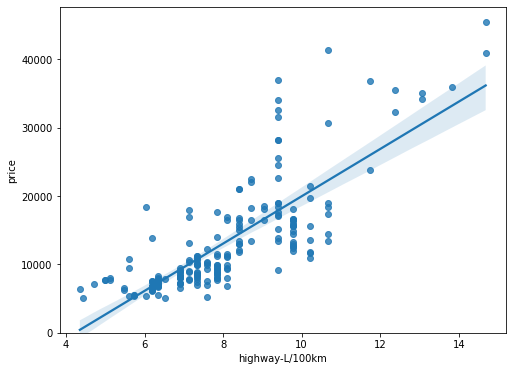

In [ ]:
width = 8
height = 6

plt.figure(figsize = (width, height))
sns.regplot(x = "highway-L/100km", y = "price", data = df)
plt.ylim(0, )
plt.show()

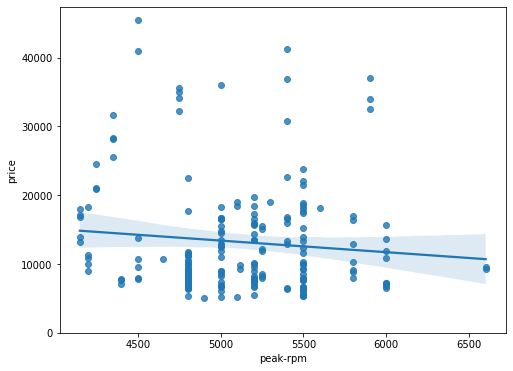

In [ ]:
width = 8
height = 6

plt.figure(figsize = (width, height))
sns.regplot(x = "peak-rpm", y = "price", data = df)
plt.ylim(0, )
plt.show()

In [ ]:
df[["highway-L/100km", "peak-rpm", "price"]].corr()

,highway-L/100km,peak-rpm,price
highway-L/100km,1.000000,0.017736,0.801118
peak-rpm,0.017736,1.000000,-0.101542
price,0.801118,-0.101542,1.000000


**Residual Plot**

visualize the variance of the data is to use a residual plot

*residual* : the difference between the observed value (y) and the predicted values (yhat) is called the residual (e) 

*residual plot* is a graph that shows the residuals on the vertical axis and the independe variables on the horizontal x-axis

**if the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropiate for the data, this means that the variance is constant, and thus the linear model is a good fit for this data**

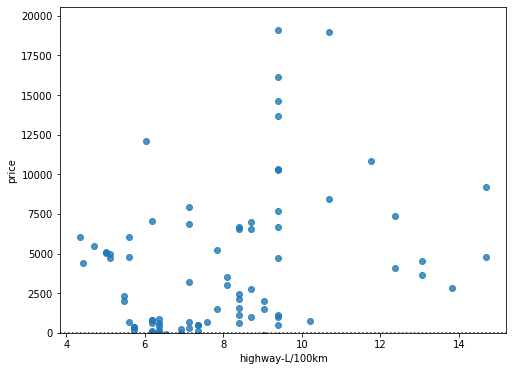

In [ ]:
width = 8
height = 6

plt.figure(figsize = (width, height))
sns.residplot(x = "highway-L/100km", y = "price", data = df)
plt.ylim(0, )
plt.show()

**Visualization Multiple Linear Regression**


In [ ]:
z = df[["horsepower", "curb-weight", "engine-size", "highway-L/100km"]]
y = df["price"]
z.head()

yhat = lr_2.predict(z)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


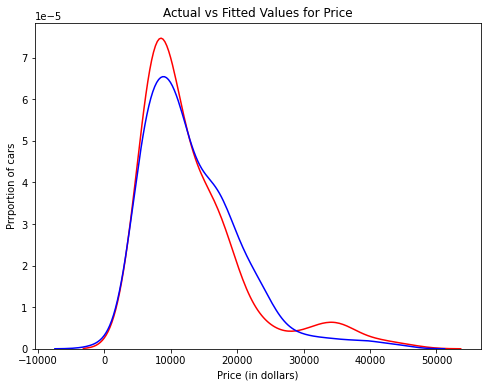

In [ ]:
plt.figure(figsize = (width, height))

ax1 = sns.distplot(df["price"], hist = False, color = "r", label = "Actual value")
sns.distplot(yhat, hist = False, color = "b", label = "Fitted Values", ax = ax1)

plt.title("Actual vs Fitted Values for Price")
plt.xlabel("Price (in dollars)")
plt.ylabel("Prrportion of cars")

plt.show()
plt.close()

**Polynomial Regression and Pipleline**

* Second order
* Third order
* N - order

In [ ]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
  x_new = np.linspace(2.5, 17.5, 100)
  y_new = model(x_new)

  plt.plot(independent_variable, dependent_variable, ".", x_new, y_new, "-")
  plt.title("Polynomial Fit with Matplotlib for Price - length")
  ax = plt.gca()
  ax.set_facecolor((0.898, 0.898, 0.898))
  fig = plt.gcf()
  plt.xlabel(Name)
  plt.ylabel("Price of Cars")

  plt.show()
  plt.close()

In [ ]:
x = df["highway-L/100km"]
y = df["price"]

In [ ]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)

print(p)

       3         2
-23.4 x + 923.6 x - 7083 x + 2.152e+04


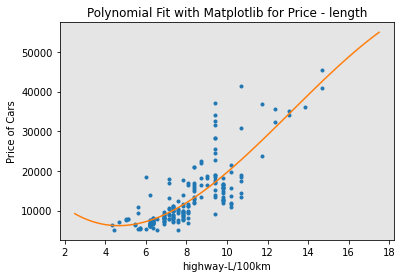

In [ ]:
PlotPolly(p, x, y, "highway-L/100km")


In [ ]:
np.polyfit(x, y, 3)

array([  -23.40461026,   923.57034965, -7083.14334079, 21515.16034362])

          11          10         9         8             7
0.003545 x  - 0.4733 x  + 26.87 x - 870.3 x + 1.803e+04 x
              6             5             4            3             2
 - 2.523e+05 x + 2.441e+06 x - 1.637e+07 x + 7.47e+07 x - 2.213e+08 x + 3.832e+08 x - 2.943e+08


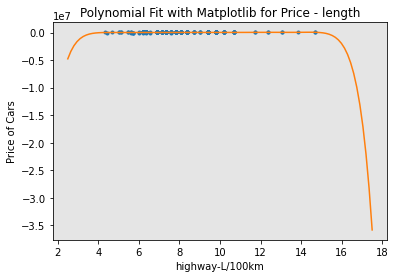

In [ ]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1, x, y, "highway-L/100km")


we can perform a polynomial transform on multiple featuress

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pr = PolynomialFeatures(degree = 2)

pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [ ]:
z.head()

,horsepower,curb-weight,engine-size,highway-L/100km
0,111,2548,130,8.703704
1,111,2548,130,8.703704
2,154,2823,152,9.038462
3,102,2337,109,7.833333
4,115,2824,136,10.681818


In [ ]:
z_pr = pr.fit_transform(z)
print("Shape of z: {}".format(z.shape))
print("Shape of z_pr: {}".format(z_pr.shape))

Shape of z: (201, 4)
Shape of z_pr: (201, 15)


After the transformation, the number od features increase (4 --- 15)

**Pipeline**

Data pipeline simplify the steps of processing the data. We use the module *Pipeline*. We also use *StandardScaler* as a step in our pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Creating a pipeline is **list of tuples**

In [ ]:
Input = [("scale", StandardScaler()), ("polynomial", PolynomialFeatures(include_bias= False)), ("model", LinearRegression())]

In [ ]:
pipe = Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

Transform and fit the model simultaneously

In [ ]:
z = z.astype(float)

pipe.fit(z, y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
y[0:4]

0    13495.0
1    16500.0
2    16500.0
3    13950.0
Name: price, dtype: float64

In [ ]:
ypipe = pipe.predict(z)
ypipe[0:4]

array([12396.25072589, 12396.25072589, 18427.88376418,  9983.16028344])

In [ ]:
Input = [("scale", StandardScaler()), ("model", LinearRegression())]

pipe = Pipeline(Input)

pipe.fit(z, y)
ypipe = pipe.predict(z)
ypipe[0:5]

array([14055.18192433, 14055.18192433, 18643.05058857, 10759.40130978,
       16667.53138368])

**Measures for In - Sample Evaluation**

we also want a quantitative measure to determine how accurate the model is

* $R^2$
  * Cofficient of determination, is a measure how to close the data is to the fitted regression line

* $MSE-Mean Squared Error$
  * measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated values (yhat)

**Model 1: Simple Linear Regression**

In [ ]:
#Remember the first Regression line
x = df[["highway-L/100km"]]
y = df["price"]
lr = LinearRegression()
lr.fit(x, y)

print("The R-square is", lr.score(x, y))

The R-square is 0.6417894513258818


In [ ]:
from sklearn.metrics import mean_squared_error


In [ ]:
yhat = lr.predict(x)

mse = mean_squared_error(y, yhat)

print("The mean square error of price and predicted values is:{}".format(mse))

The mean square error of price and predicted values is:22510543.777085222


**Model 2: Multiple Linear Regression**

In [ ]:
lr2 = LinearRegression()
lr2.fit(z, y)

yhat_2 = lr2.predict(z)

mse_2 = mean_squared_error(y, yhat_2)

print("The R-square is:{}".format(lr2.score(z, y)))
print("The mean square error of price and predicted values is:{}".format(mse_2))

The R-square is:0.8118544998135149
The mean square error of price and predicted values is:11823374.64400718


In [ ]:
lr3 = PolynomialFeatures
lr2.fit(z, y)

yhat_2 = lr2.predict(z)

mse_2 = mean_squared_error(y, yhat_2)

print("The R-square is:{}".format(lr2.score(z, y)))
print("The mean square error of price and predicted values is:{}".format(mse_2))

**Model 3: Polynomial Fit**



In [ ]:
from sklearn.metrics import r2_score

In [ ]:
x = df["highway-L/100km"]

f3 = np.polyfit(x, y, 3)
p3 = np.poly1d(f3)

r_squared = r2_score(y, p3(x))
print("The R-squared is:", r_squared)
print("The mean Squared Erros is: {}".format(mean_squared_error(y, p3(x))))

The R-squared is: 0.675358166081217
The mean Squared Erros is: 20401030.18001941


**Prediction and Decision Making**

In [ ]:
new_input = np.arange(1, 20, 1).reshape(-1, 1)

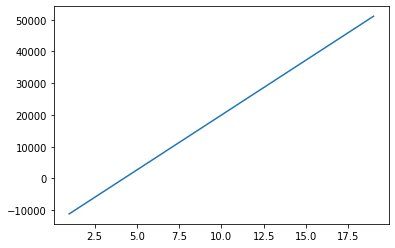

In [ ]:
lr.fit(df[["highway-L/100km"]], y)
lr
yhat = lr.predict(new_input)

plt.plot(new_input, yhat)
plt.show()

**Decision Making: Determining a Good Model Fit**

* What is a good R-squared value?
  * When comparing model, the model with the higher R-Squared values is a better fit for the data

* What is a good MSE?
  * When comparing models, the model with the smallest MSE values is a better fit for the data

*model 1: Linear Regression* 
* R-squared: 0.6417
* MSE: 22510543

*model 2: Multiple Linear Regression* 
* R-squared: 0.8118
* MSE: 11823874

*model 3: Polynomial Fit* 
* R-squared: 0.6753
* MSE: 20401030

Comparing the three models, we conclude that the MLR model is the best model to be able to predict price form our dataset

# Module 5 - Model Evaluation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("clean_automobile.csv")
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0


Keeps only the data that contain numerica values

In [ ]:
df = df._get_numeric_data()
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476,0,1,1,0
1,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476,0,1,1,0
2,1,122,94.5,0.822681,0.909722,0.876254,2823,152,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421,0,1,1,0
3,2,164,99.8,0.848630,0.919444,0.908027,2337,109,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667,0,1,1,0
4,2,164,99.4,0.848630,0.922222,0.908027,2824,136,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556,0,1,1,0


In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual

function for plotting

In [ ]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
  width = 8
  height = 6

  plt.figure(figsize = (width, height))

  ax1 = sns.distplot(RedFunction, hist = False, color = "r", label = RedName)
  ax2 = sns.distplot(BlueFunction, hist = False, color = "b", label = BlueName, ax = ax1)

  plt.title(Title)
  plt.xlabel("Price (in dollars)")
  plt.ylabel("Proportion of cars")
  plt.legend()

  plt.show()
  plt.close()

In [ ]:
def PollyPlot(x_train, x_test, y_train, y_test, lr, poly_transform):
  width = 8
  height = 6

  plt.figure(figsize = (width, height))

  x_max = max([x_train.values.max(), x_test.values.max()])
  x_min = max([x_train.values.min(), x_test.values.min()])

  x = np.arange(x_min, x_max, 0.1)

  plt.plot(x_train, y_train, "ro", label = "Training data")
  plt.plot(x_test, y_test, "go", label = "Test data")
  plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label = "Predicted Function")
  plt.ylim([-10000, 60000])
  plt.ylabel("Price")
  plt.legend()

**Training and Testing**

An important step in testing your model is to split your data into training ans testing data

In [ ]:
y_data = df["price"]
x_data = df.drop("price", axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.10, random_state = 1)

print("Number of test samples: {}".format(len(y_test)))
print("Number of train samples: {}".format(len(y_train)))

Number of test samples: 21
Number of train samples: 180


In [ ]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_data, y_data, test_size = 0.40, random_state = 0)

print("Number of test samples: {}".format(len(y_test_1)))
print("Number of train samples: {}".format(len(y_train_1)))

Number of test samples: 81
Number of train samples: 120


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()


In [ ]:
#Train de model
lr.fit(x_train[["horsepower"]], y_train)

#Test the model
print("Using Test data")
print("The R-squared vavlues is", lr.score(x_test[["horsepower"]], y_test))
print("")
print("Using Training data")
print("The R-squared vavlues is", lr.score(x_train[["horsepower"]], y_train))

Using Test data
The R-squared vavlues is 0.36339478087886834

Using Training data
The R-squared vavlues is 0.6622424809407366


In [ ]:
#Train de model
lr.fit(x_train_1[["horsepower"]], y_train_1)

#Test the model
print("Using Test data")
print("The R-squared vavlues is", lr.score(x_test_1[["horsepower"]], y_test_1))
print("")
print("Using Training data")
print("The R-squared vavlues is", lr.score(x_train_1[["horsepower"]], y_train_1))

Using Test data
The R-squared vavlues is 0.7141148824069643

Using Training data
The R-squared vavlues is 0.5757836772044477


**Cross-Validation Score**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
Rcross = cross_val_score(lr, x_data[["horsepower"]], y_data, cv = 4)
print("All the 4 R-squared are:", Rcross)

All the 4 R-squared are: [0.77477095 0.51725019 0.74924821 0.04771764]


In [ ]:
print("The mean of the fold are: {} and the std are: {}".format(Rcross.mean(), Rcross.std()))

The mean of the fold are: 0.5222467481979474 and the std are: 0.29176230741826353


We can use negative squared error as a score by setting the parameter "scoring" metric to "neg_mean_squared_error"

In [ ]:
-1 * cross_val_score(lr, x_data[["horsepower"]], y_data, cv = 4, scoring = "neg_mean_squared_error")

array([20240865.23167852, 43737944.37864213, 12470270.77569642,
       17574447.8797166 ])

In [ ]:
Rcross = cross_val_score(lr, x_data[["horsepower"]], y_data, cv = 2)
print("All the 4 R-squared are:", Rcross)
print("The mean of the fold are: {} and the std are: {}".format(Rcross.mean(), Rcross.std()))

All the 4 R-squared are: [0.59038906 0.44448529]
The mean of the fold are: 0.5174371732192354 and the std are: 0.0729518864766161


You can also use the function "cross_val_predict" to predict the output

The function splits up the data into the specified number of folds, with one fold for testing and the other folds are used for training

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
yhat = cross_val_predict(lr, x_data[["horsepower"]], y_data, cv = 4)
yhat[0:5]

array([14144.56553323, 14144.56553323, 20819.140433  , 12747.56148444,
       14765.45622158])

**Overtifitting, Underfitting and Model Selection**



In [ ]:
lr = LinearRegression()

lr.fit(x_train[["horsepower", "curb-weight", "engine-size", "highway-L/100km"]], y_train)

yhat_train = lr.predict(x_train[["horsepower", "curb-weight", "engine-size", "highway-L/100km"]])
print("Prediction Training data:", yhat_train[0:5])

print("")
yhat_test = lr.predict(x_test[["horsepower", "curb-weight", "engine-size", "highway-L/100km"]])
print("Prediction Test Data:", yhat_test[0:5])

Prediction Training data: [ 7624.75122537 28449.32547101 14840.29417926  3856.19666966
 34565.77408311]

Prediction Test Data: [11045.54922944  5844.25035825 11257.69097695  6886.71060678
 15327.29253493]


Let's examine the distribution of the predicted values od the training data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


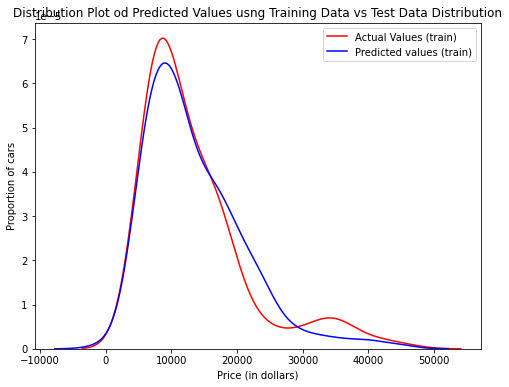

In [ ]:
Title = "Distribution Plot od Predicted Values usng Training Data vs Test Data Distribution"
DistributionPlot(y_train, yhat_train, "Actual Values (train)", "Predicted values (train)", Title)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


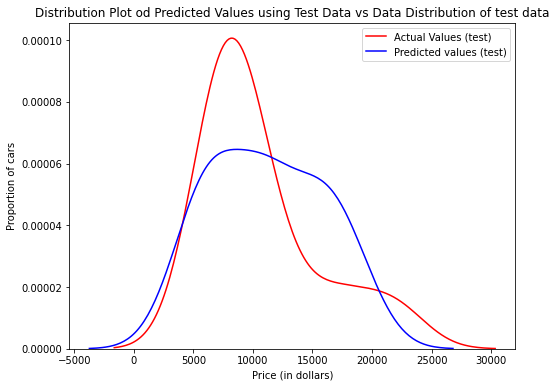

In [ ]:
Title = "Distribution Plot od Predicted Values using Test Data vs Data Distribution of test data"
DistributionPlot(y_test, yhat_test, "Actual Values (test)", "Predicted values (test)", Title)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

**Overfitting**

Occurs when the model fits tje noise, but no the underlying process. Therefore, when testing your model using the test set, your model does not perform as well since it is modelling noise, no the underlying process that generated the relationship

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.45, random_state = 0)

In [ ]:
pr = PolynomialFeatures(degree = 5)

x_train_pr = pr.fit_transform(x_train[["horsepower"]])
x_test_pr = pr.fit_transform(x_test[["horsepower"]])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False,
                   order='C')

In [ ]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6722.97393208,  7301.50355806, 12214.19872987, 18901.51151902,
       20000.03784415])

In [ ]:
print("Predicted values:", yhat[0:5])
print("True values:", y_test[0:5].values)

Predicted values: [ 6722.97393208  7301.50355806 12214.19872987 18901.51151902
 20000.03784415]
True values: [ 6295. 10698. 13860. 13499. 15750.]


The Train R-squared is 0.5571757383932234
The Test R-squared is -29.62478858643291


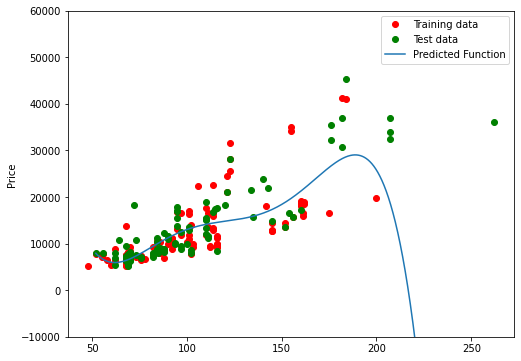

In [ ]:
PollyPlot(x_train[["horsepower"]], x_test[["horsepower"]], y_train, y_test, poly, pr)
print("The Train R-squared is", poly.score(x_train_pr, y_train))
print("The Test R-squared is", poly.score(x_test_pr, y_test))

Let's se how the R^2 Changes on the test data for different order polynomials and then the results


Text(3, 0.75, 'Maximum R^2')

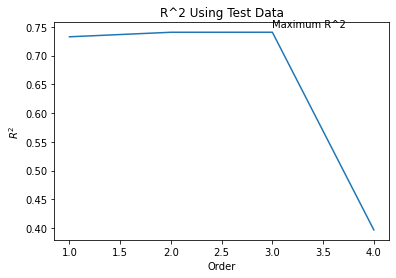

In [ ]:
Rsqu_test = []
order = [1, 2, 3, 4]
for n in order:
  pr = PolynomialFeatures(degree = n)

  x_train_pr = pr.fit_transform(x_train[["horsepower"]])
  x_test_pr = pr.fit_transform(x_test[["horsepower"]])

  lr.fit(x_train_pr, y_train)

  Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel("Order")
plt.ylabel("$R^2$")
plt.title("R^2 Using Test Data")
plt.text(3, 0.75, "Maximum R^2")

In [ ]:
def f(order, test_data):
  x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = test_data, random_state = 0)
  pr = PolynomialFeatures(degree = order)
  x_train_pr = pr.fit_transform(x_train[["horsepower"]])
  x_test_pr = pr.fit_transform(x_test[["horsepower"]])

  poly = LinearRegression()
  poly.fit(x_train_pr, y_train)
  PollyPlot(x_train[["horsepower"]], x_test[["horsepower"]], y_train, y_test, poly, pr)

In [ ]:
interact(f, order = (0, 6, 1), test_data = (0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f>

Dimension of the original features: 20
Dimension of the Transform features: 15


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


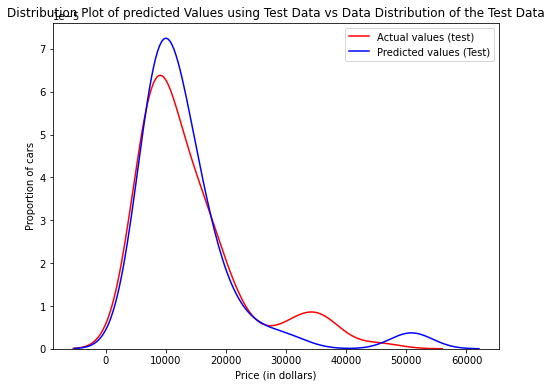

In [ ]:
pr1 = PolynomialFeatures(degree = 2)
x_train_pr1 = pr1.fit_transform(x_train[["horsepower", "curb-weight", "engine-size", "highway-L/100km"]])
x_test_pr1 = pr1.fit_transform(x_test[["horsepower", "curb-weight", "engine-size", "highway-L/100km"]])

print("Dimension of the original features:", x_train.shape[1])
print("Dimension of the Transform features:", x_train_pr1.shape[1])

poly1 = LinearRegression()
poly1.fit(x_train_pr1, y_train)
yhat_test_1 = poly1.predict(x_test_pr1)

Title = "Distribution Plot of predicted Values using Test Data vs Data Distribution of the Test Data"

DistributionPlot(y_test, yhat_test_1, "Actual values (test)", "Predicted values (Test)", Title)


**Ridge Regression**

see how the parameters alpha changes the model